#**Segmentacija kupaca**
##Projekt iz Strojnog učenja
<br>*profesor: Saša Mladenović
<br>studentica: Anamaria Babić*

##Instaliranje i importanje potrebnih biblioteka i paketa

**CILJ:** Analizirati "osobnost" kupaca kako bi trvrtke znale ciljane skupine za određene vrste proizvoda.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

##Upoznavanje sa podacima

In [ ]:
%cd /content/drive/MyDrive/STROJNO UČENJE/2024-25/PROJEKT

/content/drive/MyDrive/STROJNO UČENJE/2024-25/PROJEKT


In [ ]:
data=pd.read_csv('customer_segmentation.csv')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print(f'Tablica ima {data.shape[0]} redaka i {data.shape[1]} stupac.')

Tablica ima 2240 redaka i 29 stupac.


###Pojašnjenje varijabli



• **Id**: Jedinstveni identifikator za svaku osobu u skupu podataka.

• **Year_Birth**: Godina rođenja osobe.

• **Education**: Najviša razina obrazovanja koju je osoba stekla.

• **Marital_Status**: Bračni status osobe.

• **Income**: Godišnji prihod osobe.

• **Kidhome**: Broj male djece u kućanstvu.

• **Teenhome**: Broj tinejdžera u kućanstvu.

• **Dt_Customer**: Datum kada je kupac prvi put registriran ili postao dio baze podataka tvrtke.

• **Recency**: Broj dana od posljednje kupnje ili interakcije.

• **MntWines**: Iznos potrošen na vina.

• **MntFruits**: Iznos potrošen na voće.

• **MntMeatProducts**: Iznos potrošen na mesne proizvode.

• **MntFishProducts**: Iznos potrošen na riblje proizvode.

• **MntSweetProducts**: Iznos potrošen na slatkiše.

• **MntGoldProds**: Iznos potrošen na zlatne proizvode.

• **NumDealsPurchases**: Broj kupnji obavljenih uz popust ili u sklopu promotivne ponude.

• **NumWebPurchases**: Broj kupnji obavljenih putem web stranice tvrtke.

• **NumCatalogPurchases**: Broj kupnji obavljenih putem kataloga.

• **NumStorePurchases**: Broj kupnji obavljenih u fizičkim trgovinama.

• **NumWebVisitsMonth**: Broj posjeta web stranici tvrtke u mjesecu.

• **AcceptedCmp3**: Binarni pokazatelj (1 ili 0) je li osoba prihvatila treću marketinšku kampanju.

• **AcceptedCmp4**: Binarni pokazatelj (1 ili 0) je li osoba prihvatila četvrtu marketinšku kampanju.

• **AcceptedCmp5**: Binarni pokazatelj (1 ili 0) je li osoba prihvatila petu marketinšku kampanju.

• **AcceptedCmp1**: Binarni pokazatelj (1 ili 0) je li osoba prihvatila prvu marketinšku kampanju.

• **AcceptedCmp2**: Binarni pokazatelj (1 ili 0) je li osoba prihvatila drugu marketinšku kampanju.

• **Complain**: Binarni pokazatelj (1 ili 0) je li osoba podnijela pritužbu.

• **Z_CostContact**: Fiksni trošak povezan s kontaktiranjem kupca.

• **Z_Revenue**: Fiksni prihod povezan s uspješnim odgovorom na kampanju.

• **Response**: Binarni pokazatelj (1 ili 0) je li osoba odgovorila na marketinšku kampanju.



###Osnovno o podacima

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##Priprema podataka


###Nadopunjavanje vrijednosti kojih nema

In [ ]:
data.apply(lambda x: sum(x.isnull()))

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Vidimo da imamo nedostajuće vrijednosti samo kod značajke **Income** pa ćemo ukloniti te retke u kojima nedostajte značajka Income.

In [ ]:
print("Ukupan broj podatkovnih točaka prije uklanjanja redaka s vrijednostima koje nedostaju je: ", len(data))
data=data.dropna()
print("Ukupan broj podatkovnih točaka nakon uklanjanja redaka s vrijednostima koje nedostaju je: ", len(data))

Ukupan broj podatkovnih točaka prije uklanjanja redaka s vrijednostima koje nedostaju je:  2240
Ukupan broj podatkovnih točaka nakon uklanjanja redaka s vrijednostima koje nedostaju je:  2216


###Oblikovanje podataka

Obzirom da nam je cilj smanjiti dimenziju podataka nakon prvotne analize, zaključila sam da neke podatke možemo grupirati čime ćemo smanjiti dimenziju, a smisao će ostati isti,a neke zamijeniti prikaldnijim oblikom.

Tako ćemo npr. uvesti oznaku **Age** koja će nam davati dob kupca,a uklonit ćemo godinu rođenja.

Uvest ćemo stupac **Total_Spending** koji ćemo dobiti kako ukupanu potrošnju na hranu zbrajanjem stupaca **'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'** i **'MntGoldProds'**.  

Uvest ćemo redak **TotalChild**  koju ćemo dobiti kao zbroj djece kod kuće - **Kidhome** i tinejdžera - **Teenhome**.

**Dt_Customer** nam daje datum prve registracije kupca. Zamijenit ćemo ga s **MembershipTime** u danima.

Stupce **AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5** koji nam daju podatak je li osoba prihvatila određenu marketinšku kampanju ćemo zamijeniti sa **TotalCmp** koju ćemo dobiti kao zbroj svih kampanja.

In [ ]:
current_year=2025
data['Age']=current_year-data['Year_Birth']
#data.drop('Year_Birth',axis=1,inplace=True)

#age_bins = [18, 30, 40, 50, 60, 70, 80, 100]
#data['Age_Group'] = pd.cut(data['Age'], bins=age_bins)

spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Total_Spending'] =data[spending_columns].sum(axis=1)

data['TotalChild']=data['Teenhome']+data['Kidhome']

data["MembershipTime"] = data["Dt_Customer"].apply(lambda x: pd.to_timedelta(dt.datetime.today() - dt.datetime.strptime(x,'%d-%m-%Y')).days)


data['TotalCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

In [ ]:
#preimenovat ćemo neke značajke radi lakšeg razumijevanja
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

In [ ]:
data.head(8)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spending,TotalChild,MembershipTime,TotalCmp
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,68,1617,0,4564,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,71,27,2,4014,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,60,776,0,4213,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,41,53,1,4040,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,44,422,1,4062,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,3,11,0,58,716,1,4194,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,3,11,0,54,590,1,4494,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,3,11,0,40,169,1,4318,0


In [ ]:
def numericke_kategoricke(data):
  numeric_cols = data.select_dtypes(include=['number']).columns
  cat_cols = data.select_dtypes(include=['object']).columns
  print(f"\nCategorical Coloumns: {len(cat_cols)} \n {list(cat_cols)}")
  print(f"\nNumerical Coloumns: {len(numeric_cols)} \n {list(numeric_cols)}")
  return numeric_cols, cat_cols

In [ ]:
num,cat=numericke_kategoricke(data)


Categorical Coloumns: 3 
 ['Education', 'Marital_Status', 'Dt_Customer']

Numerical Coloumns: 31 
 ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Total_Spending', 'TotalChild', 'MembershipTime', 'TotalCmp']


##Analiza podataka

###Analiza i vizualiazcija numeričkih varijabli

Prije daljnje analize uklonit ćemo stupce koji su nam "višak".

In [ ]:
df=data.copy()
df = df.drop(['ID','Year_Birth','Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Z_CostContact', 'Z_Revenue'],axis=1)

In [ ]:
df.head(8)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending,TotalChild,MembershipTime,TotalCmp
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,1,68,1617,0,4564,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,71,27,2,4014,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,60,776,0,4213,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,41,53,1,4040,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,44,422,1,4062,0
5,Master,Together,62513.0,0,1,16,520,42,98,0,...,4,10,6,0,0,58,716,1,4194,0
6,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,...,3,7,6,0,0,54,590,1,4494,0
7,PhD,Married,33454.0,1,0,32,76,10,56,3,...,0,4,8,0,0,40,169,1,4318,0


In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending,TotalChild,MembershipTime,TotalCmp
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,2.671029,5.800993,5.319043,0.009477,0.150271,56.179603,607.075361,0.947202,4254.521209,0.298285
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,2.926734,3.250785,2.425359,0.096907,0.357417,11.985554,602.900476,0.749062,202.434667,0.679209
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000,0.000000,3901.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,48.000000,69.000000,0.000000,4081.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,2.000000,5.000000,6.000000,0.000000,0.000000,55.000000,396.500000,1.000000,4256.500000,0.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,66.000000,1048.000000,1.000000,4430.000000,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,132.000000,2525.000000,3.000000,4600.000000,4.000000


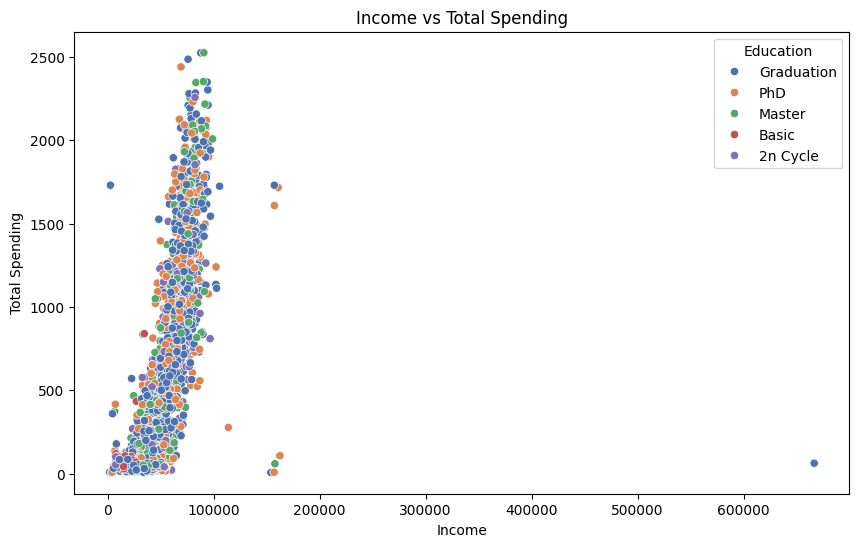

In [ ]:
#Ovisnot potrošnje obzirom na primanja obojano po razini obrazovanja
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Spending', data=df, hue='Education', palette='deep')
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Education')
plt.show()

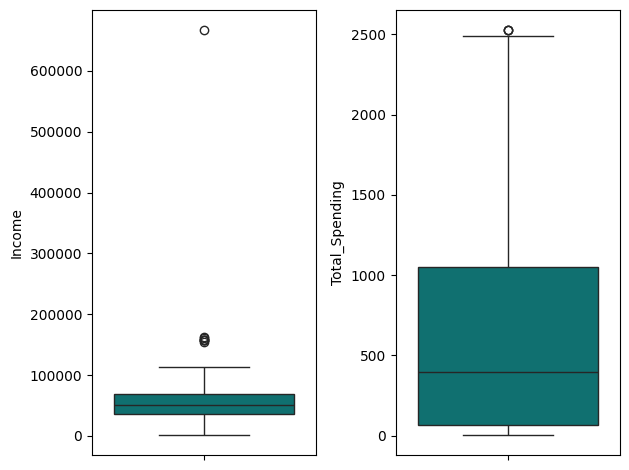

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot(df['Income'], color='teal')

plt.subplot(1, 2, 2)
sns.boxplot(df['Total_Spending'], color='teal')

plt.tight_layout()
plt.show()

Vidljivo je da imamo outlier koji previše "strši" pa ćemo ga ukloniti.

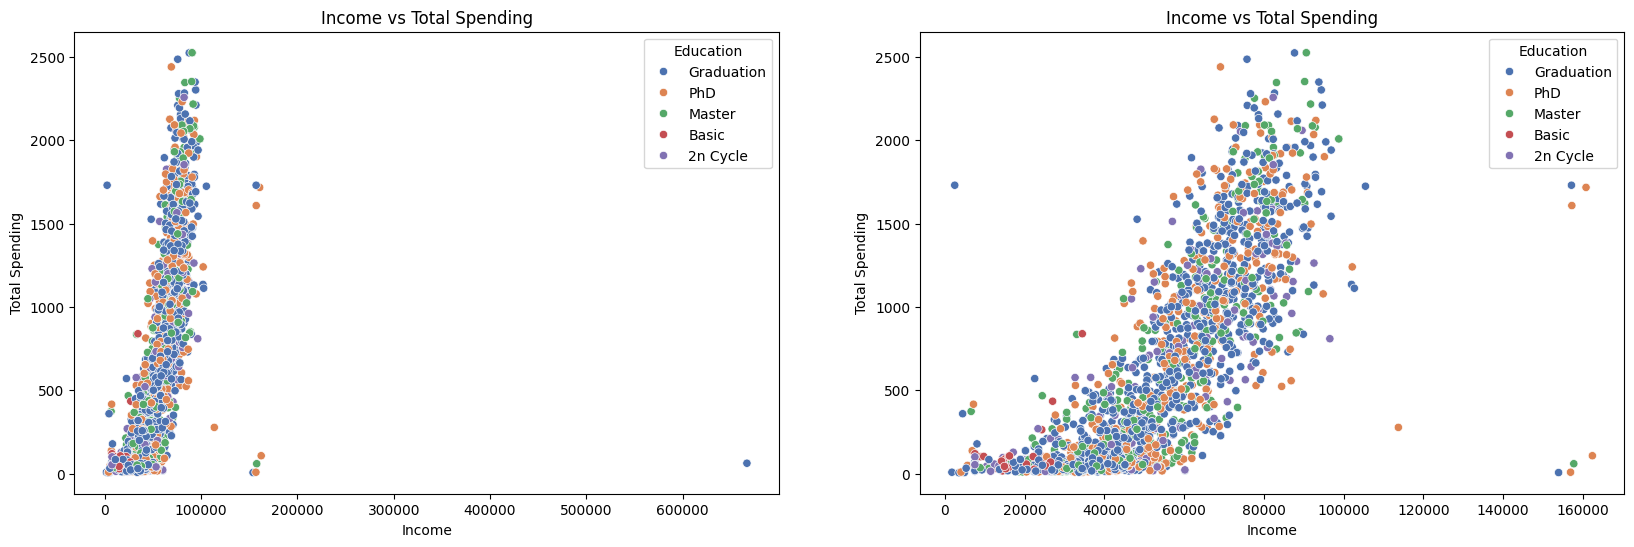

In [ ]:
#Ova funkcija uklanja outliere -  sve što je ispod Q1 - 3*IQR i iznad Q2 + 3*IQR - uobičajen prag za detekciju outliera
def remove_outliers_iqr(df, numeric_columns):
    for column in numeric_columns:
      if column != 'Response':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


plt.figure(figsize=(20, 6))
customer_data = remove_outliers_iqr(df, ['Total_Spending', 'Income'])
plt.subplot(1, 2, 1)
sns.scatterplot(x='Income', y='Total_Spending', data=df, hue='Education', palette='deep')
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Education')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Income', y='Total_Spending', data=customer_data, hue='Education', palette='deep')
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.legend(title='Education')

plt.show()

In [ ]:
numerical_data = df.select_dtypes(include=['number'])
print("Numeričke varijable su: ", list(numerical_data.columns))
print("Numeričkih varijabli ima: ", numerical_data.shape[1])

Numeričke varijable su:  ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'Total_Spending', 'TotalChild', 'MembershipTime', 'TotalCmp']
Numeričkih varijabli ima:  22


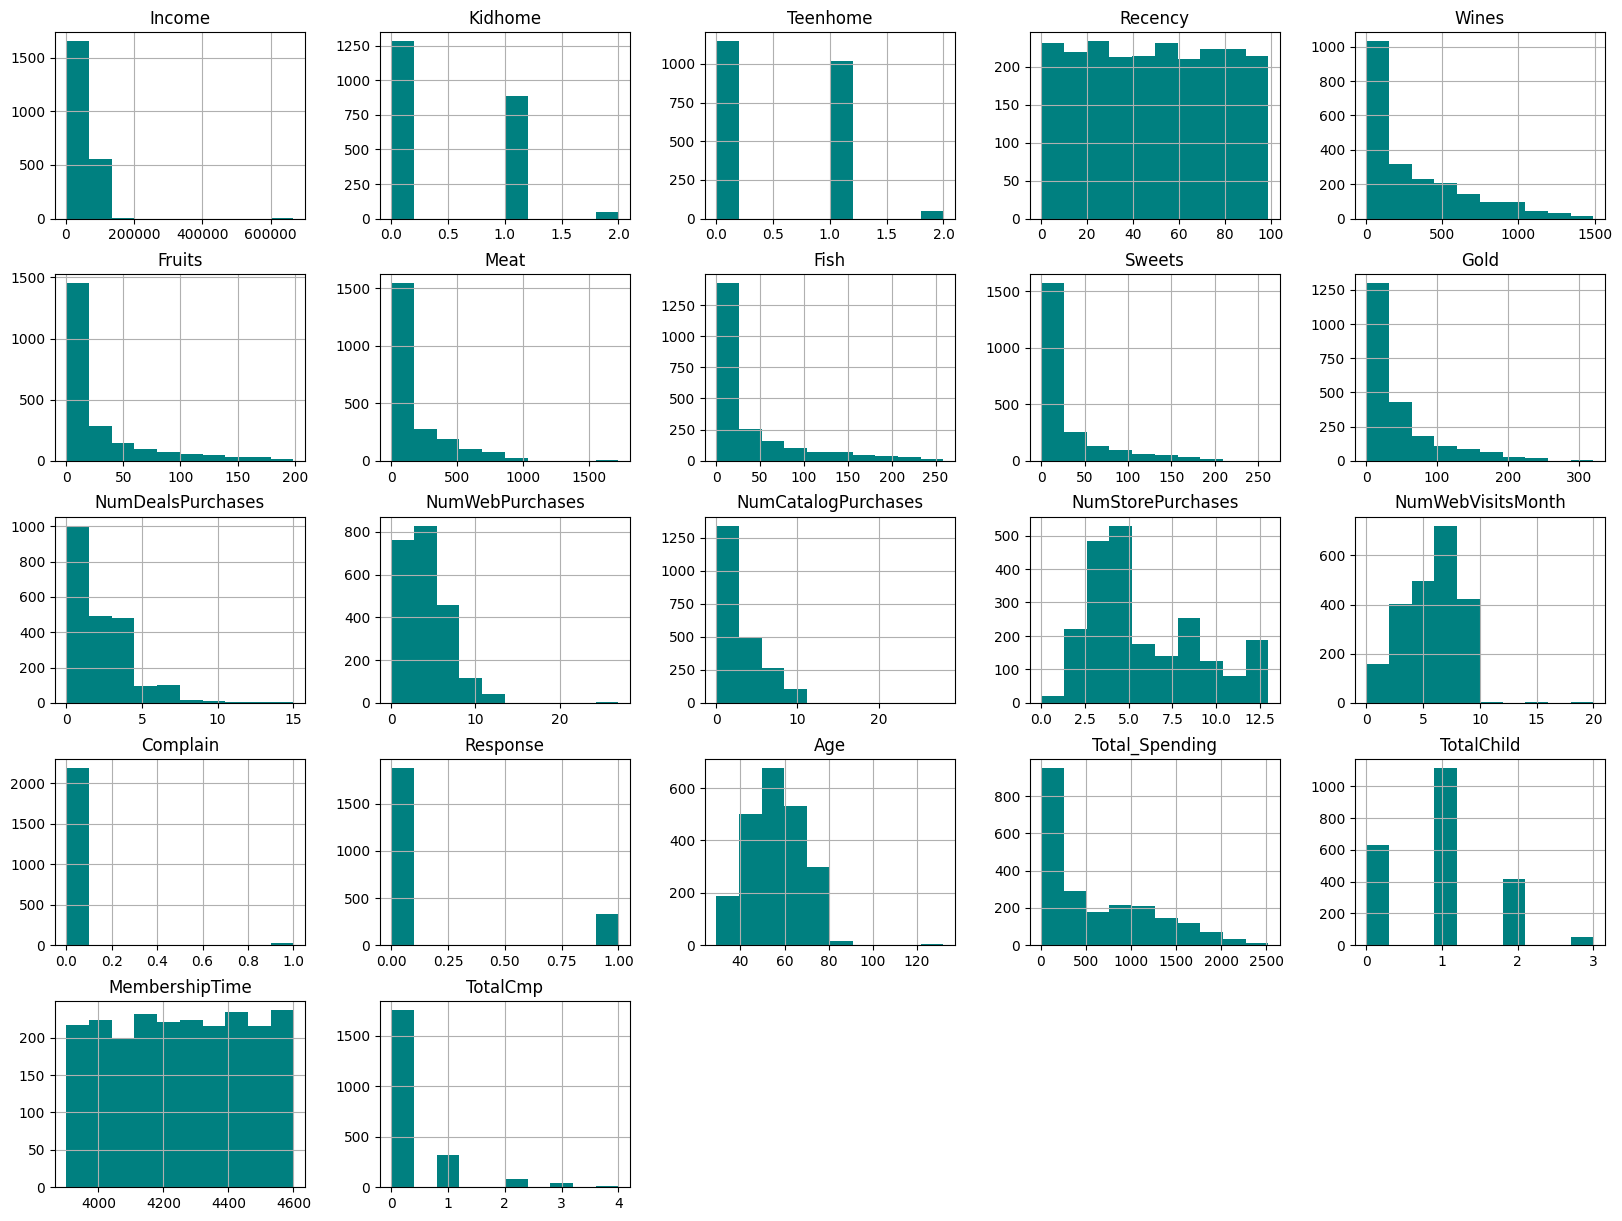

In [ ]:
numerical_data.hist(figsize=(20, 15), color='teal')
plt.show()

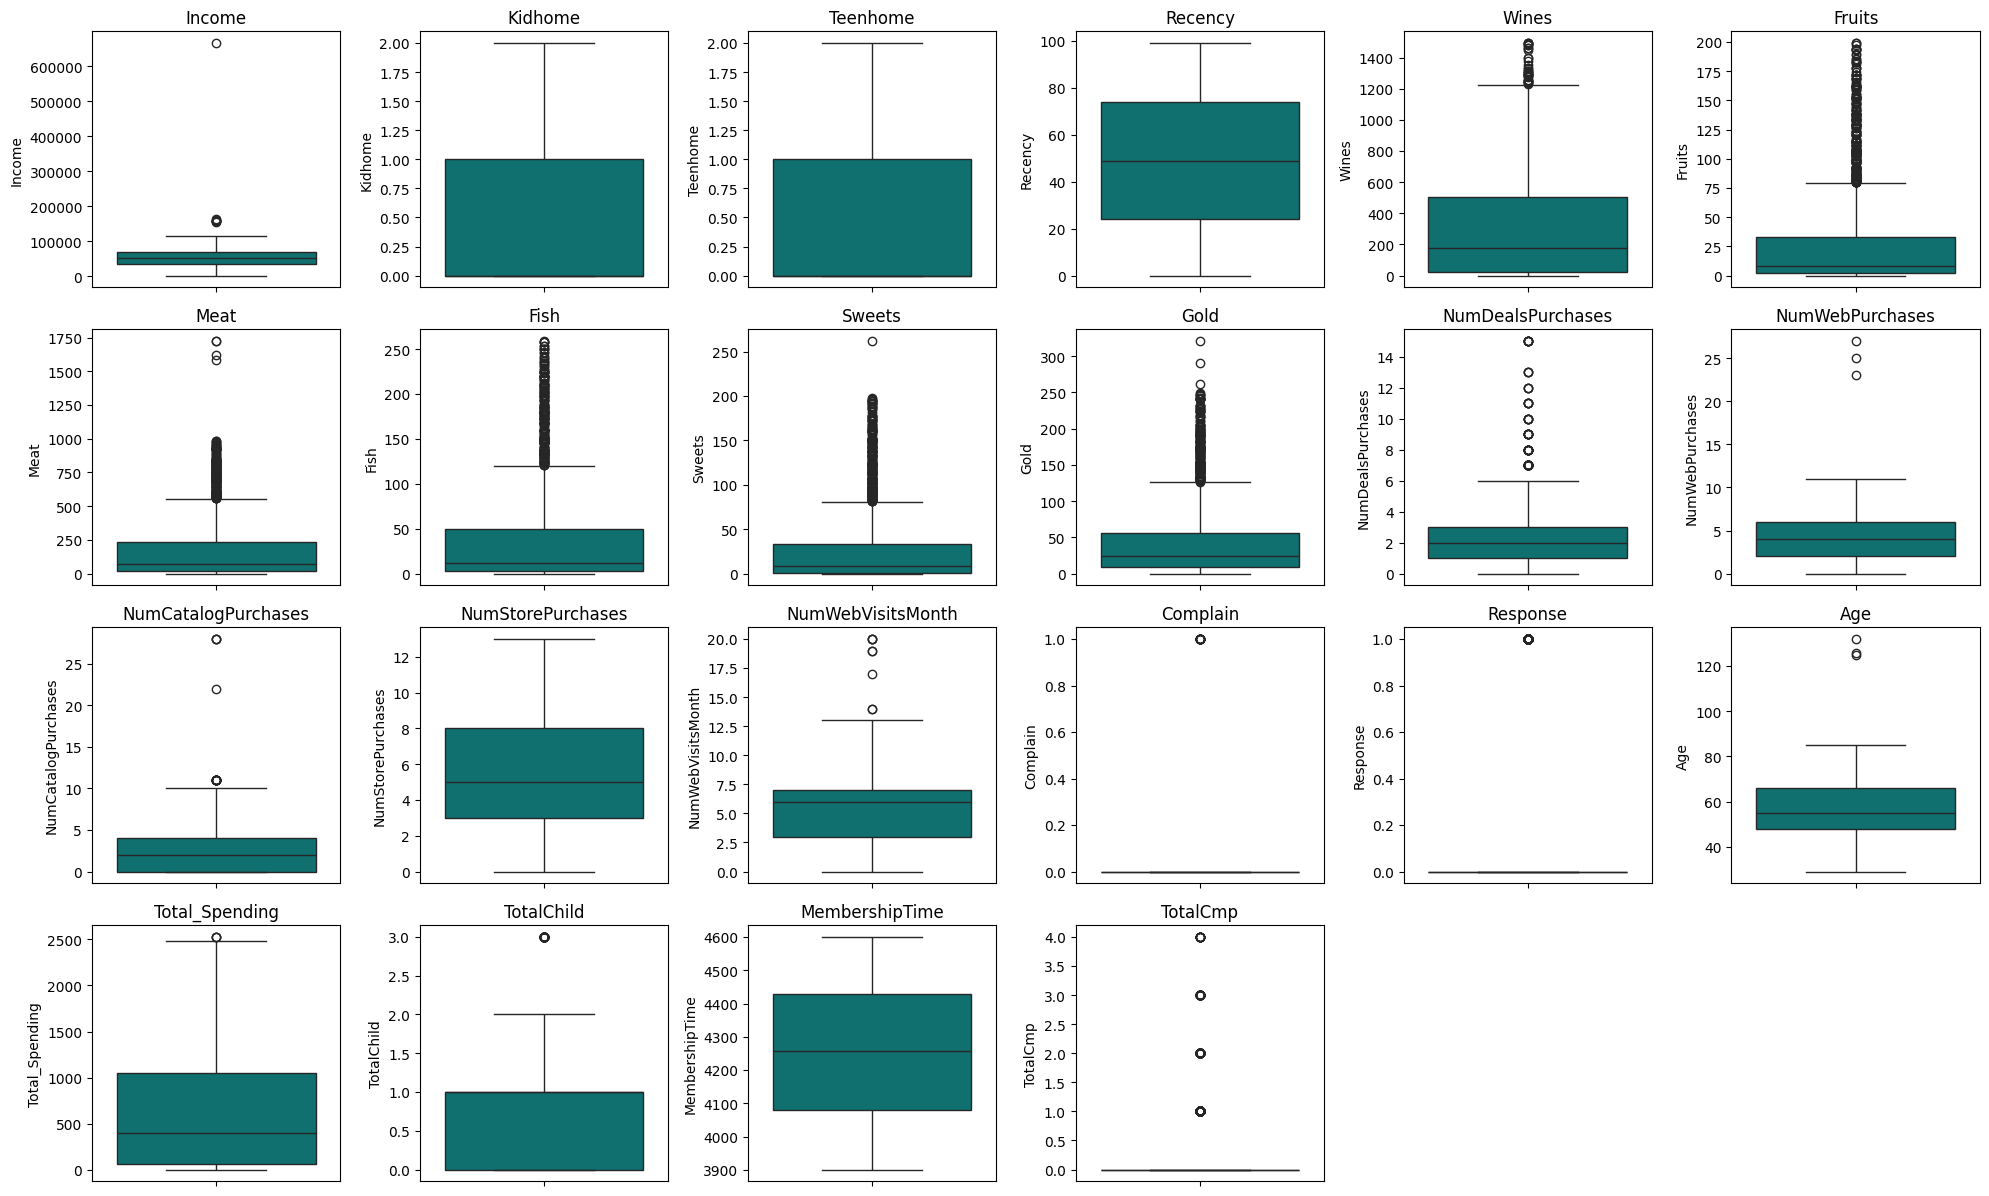

In [ ]:
plt.figure(figsize=(20, 15))

# Kreiranje boxplotova za svaku numeričku varijablu
for i, column in enumerate(numerical_data.columns):
    plt.subplot(5, 6, i+1)
    sns.boxplot(y=numerical_data[column],color="teal")
    plt.title(column)

plt.tight_layout()
plt.show()


Vidimo da kod značajke **Age** imamo vrjednosti iznad 100. Njih smatramo outlierima pa ćeo vrijednosti iznad 100 ukloniti.

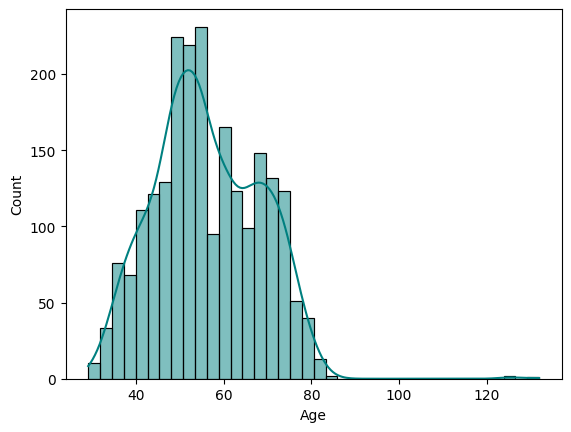

In [ ]:
sns.histplot(df['Age'],kde=True,color='teal')
plt.show()

In [ ]:
df = df[(df["Age"]<100)]

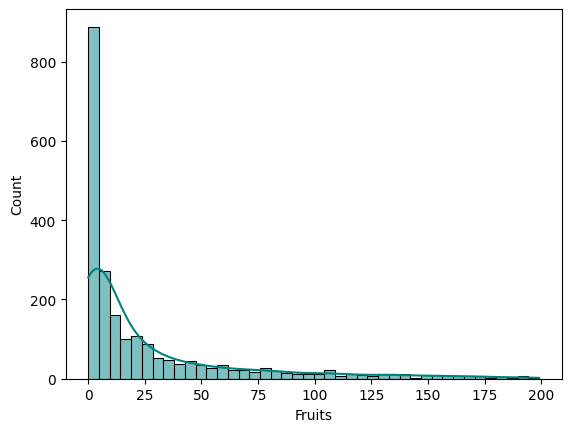

In [ ]:
sns.histplot(df['Fruits'],kde=True,color='teal')
plt.show()

In [ ]:
df_num, df_cat=numericke_kategoricke(df)


Categorical Coloumns: 2 
 ['Education', 'Marital_Status']

Numerical Coloumns: 22 
 ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'Age', 'Total_Spending', 'TotalChild', 'MembershipTime', 'TotalCmp']


In [ ]:
numericke=list(df_num)
#numericke.remove('Z_Revenue')
#numericke.remove('Z_CostContact')

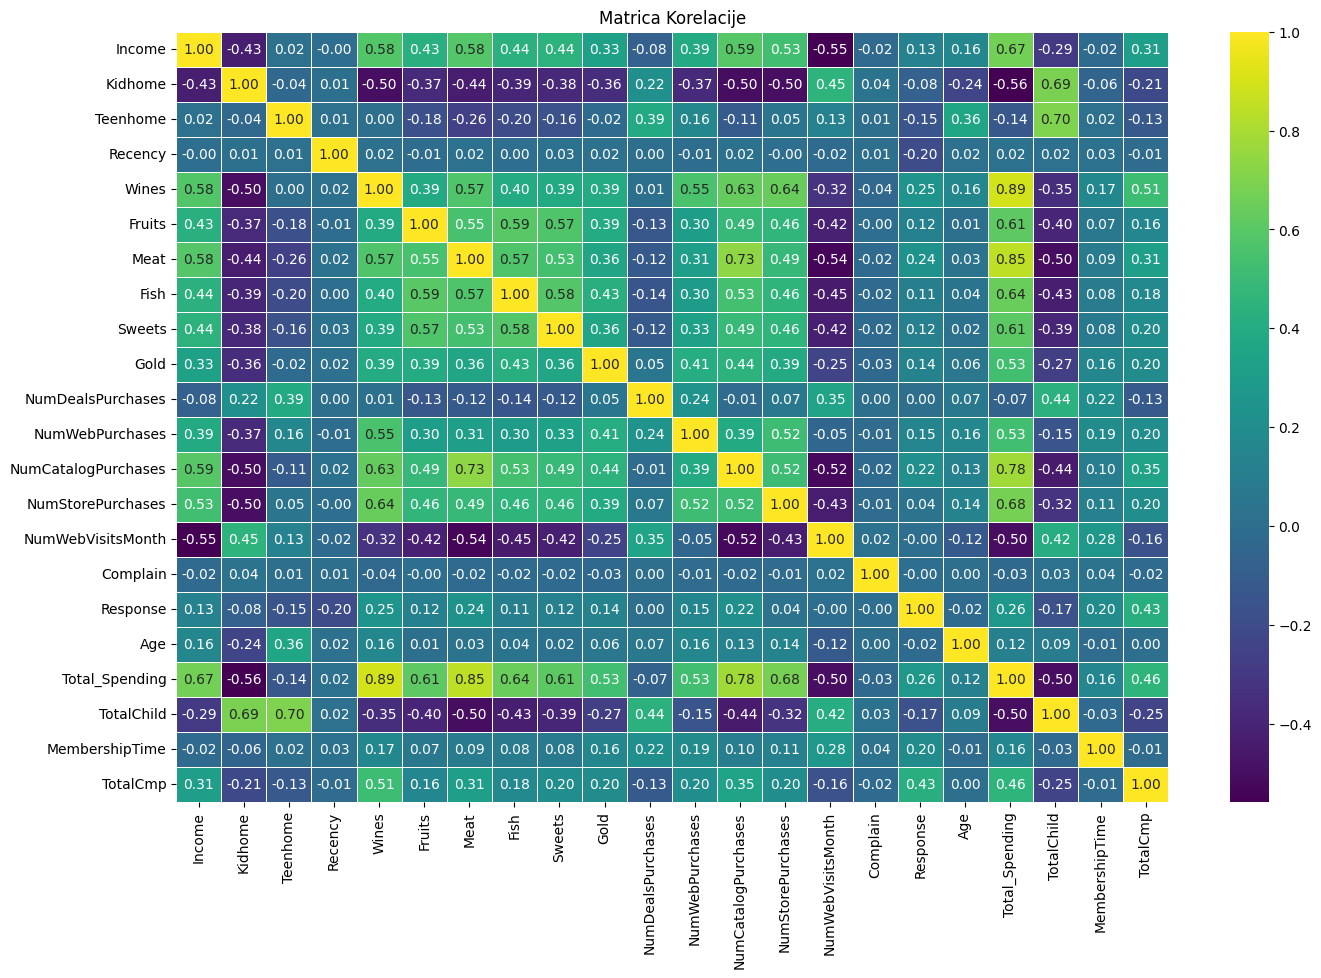

In [ ]:
correlation_matrix = df[numericke].corr()

# Kreiramo vizualizaciju pomoću seaborn heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Dodajemo naziv i prikazujemo graf
plt.title('Matrica Korelacije')
plt.show()

###Analiza kategoričkih varijabli i pretvaranje u numeričke

<ipython-input-210-6645cd4e78e4>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




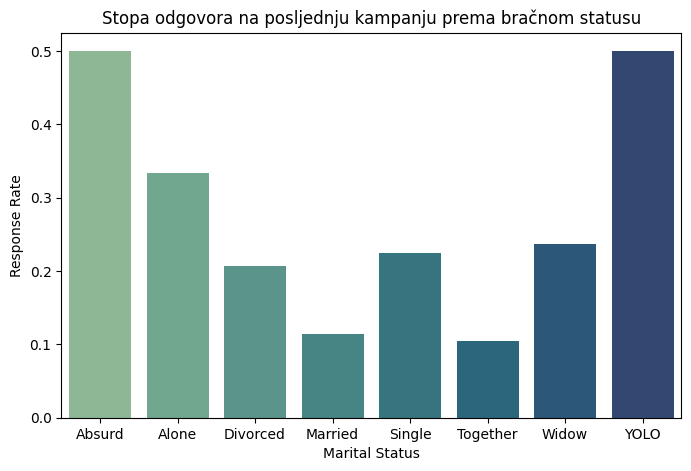

In [ ]:
response_by_marital_status = customer_data.groupby('Marital_Status')['Response'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Marital_Status', y='Response', data=response_by_marital_status, palette='crest')
plt.title('Stopa odgovora na posljednju kampanju prema bračnom statusu')
plt.xlabel('Marital Status')
plt.ylabel('Response Rate')
plt.show()

<ipython-input-211-e05455d7d134>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




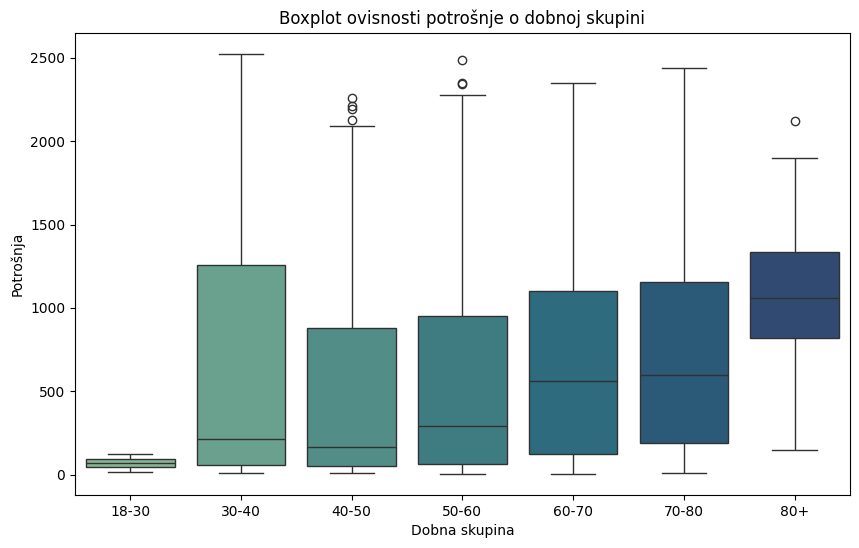

In [ ]:
# Kreiranje dobnih skupina
bins = [18,30,40,50,60,70,80,100]  # Definišite granice dobnih skupina
labels = ['18-30', '30-40', '40-50', '50-60', '60-70','70-80','80+']  # Oznake za dobne skupine


# Kreiranje boxplot-a ovisnosti potrošnje o dobnoj skupini
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(data['Age'], bins=bins, labels=labels, right=False), y=data['Total_Spending'], palette='crest')

plt.title('Boxplot ovisnosti potrošnje o dobnoj skupini')
plt.xlabel('Dobna skupina')
plt.ylabel('Potrošnja')

# Prikazivanje grafa
plt.show()

<ipython-input-212-6759eda00016>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




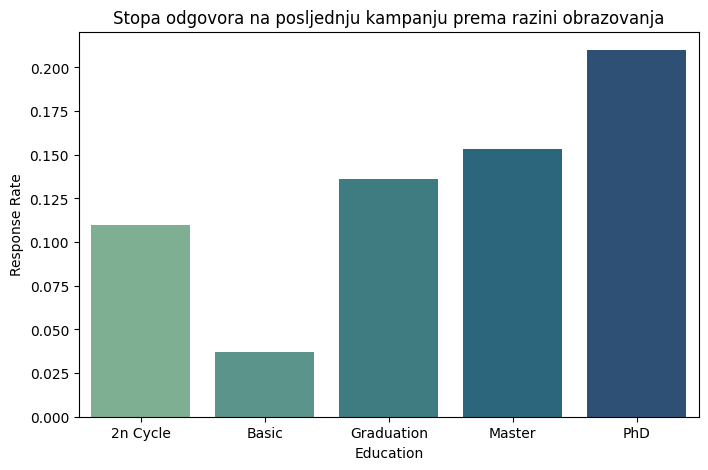

In [ ]:
response_by_education = customer_data.groupby('Education')['Response'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Education', y='Response', data=response_by_education, palette='crest')
plt.title('Stopa odgovora na posljednju kampanju prema razini obrazovanja')
plt.xlabel('Education')
plt.ylabel('Response Rate')
plt.show()

In [ ]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

<ipython-input-214-86237aa0c99e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




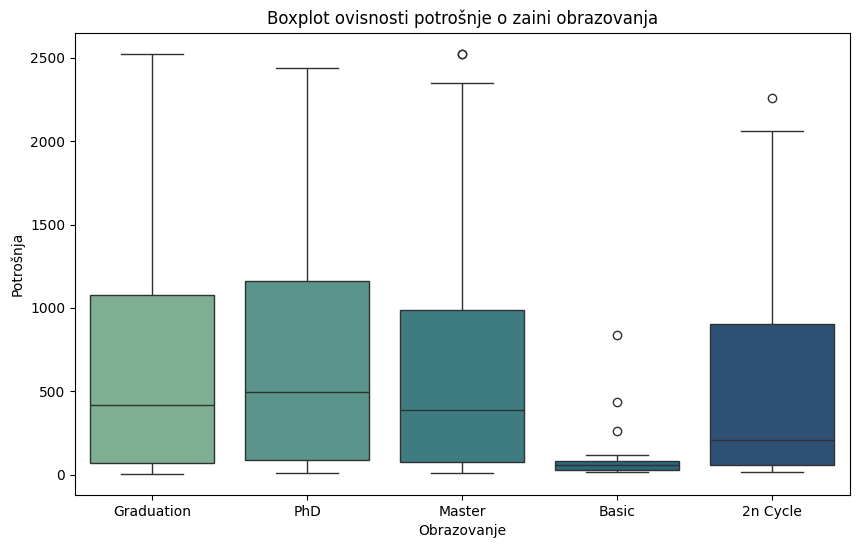

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Total_Spending', data=df, palette='crest')
plt.title('Boxplot ovisnosti potrošnje o zaini obrazovanja')
plt.xlabel('Obrazovanje')
plt.ylabel('Potrošnja')

# Prikazivanje grafa
plt.show()

In [ ]:
data.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
Wines,int64


In [ ]:
#numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
df[df_num].describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending,TotalChild,MembershipTime,TotalCmp
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,...,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,52236.581563,0.441934,0.505648,49.007682,305.153638,26.323995,166.962494,37.635337,27.034794,43.911432,...,2.671487,5.805242,5.321735,0.009038,0.150474,56.082693,607.021690,0.947582,4254.731586,0.298238
std,25178.603047,0.536965,0.544236,28.941864,337.305490,39.735932,224.226178,54.763278,41.085433,51.699746,...,2.927096,3.250752,2.425092,0.094657,0.357617,11.700216,602.488663,0.749297,202.450745,0.679446
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000,0.000000,3901.000000,0.000000
25%,35246.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,48.000000,69.000000,0.000000,4081.000000,0.000000
50%,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,55.000000,397.000000,1.000000,4257.000000,0.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,66.000000,1048.000000,1.000000,4430.000000,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,85.000000,2525.000000,3.000000,4600.000000,4.000000


In [ ]:
df_cat

Index(['Education', 'Marital_Status'], dtype='object')

In [ ]:
df_num

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat',
       'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Total_Spending', 'TotalChild',
       'MembershipTime', 'TotalCmp'],
      dtype='object')

Vidimo da imamo dvije varijable koje su tipa object. Da bi mogli primjentiti PCA prvo trebamo te varijable kodirati.


In [ ]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Kod stavke Education vidim da je mogu smatrati ordinalnom pa ih mogu kodirati na način da najniži stupanj obrazovanja bude kodiran brojem 1, a najviši brojem 5.

In [ ]:
education_order = {'Basic': 1, '2n Cycle': 2, 'Graduation': 3, 'Master': 4, 'PhD': 5}
df['Education']=df['Education'].map(education_order)

In [ ]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Vidimo da imamo 8 opcija kod bračnog statusa. Pošto on nije ordinalan, odnosno ne možemo uspoređivati dane vrijesnosti, odlučila sam se koristiti  Frequency Encoding-om. Zašto ne One-hot Encoding-om? On bi mi dodano povećao dimenziju skupa podataka koju ću kasnije svakako željeti smanjiti, a ako pokušam to zamijentii listom, opet mi neće biti dobro za PCA.


In [ ]:
freq_encoding = df['Marital_Status'].value_counts(normalize=True).to_dict()

# Zamjena s frekvencijom
df['Marital_Status'] = df['Marital_Status'].map(freq_encoding)

In [ ]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending,TotalChild,MembershipTime,TotalCmp
0,3,0.212381,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,1,68,1617,0,4564,0
1,3,0.212381,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,71,27,2,4014,0
2,3,0.258473,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,60,776,0,4213,0
3,3,0.258473,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,41,53,1,4040,0
4,5,0.387257,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,44,422,1,4062,0


In [ ]:
y=df['Response']
X=df.drop('Response',axis=1)
#df=data.copy()
#df = df.drop(['Z_CostContact', 'Year_Birth','Dt_Customer','Total_Spending','Z_Revenue','Response','Teenhome','Kidhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Age_Group'],axis=1)

##Skaliranje podataka

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)

In [ ]:
X_scaled.shape

(2213, 24)

In [ ]:
X_scaled

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Total_Spending,TotalChild,MembershipTime,TotalCmp
0,-0.458724,-0.585879,0.234435,-0.823208,-0.929307,0.310773,0.978107,1.552498,1.690807,2.454109,...,2.504247,-0.555456,0.692198,-0.095498,2.376057,1.018785,1.676723,-1.264914,1.527968,-0.439042
1,-0.458724,-0.585879,-0.234084,1.039532,0.908545,-0.380424,-0.872266,-0.637451,-0.718020,-0.650863,...,-0.571168,-1.170837,-0.132699,-0.095498,-0.420865,1.275248,-0.962927,1.404857,-1.189356,-0.439042
2,-0.458724,-0.147357,0.769733,-0.823208,-0.929307,-0.795142,0.358351,0.570796,-0.178264,1.339972,...,-0.229456,1.290688,-0.545148,-0.095498,-0.420865,0.334882,0.280531,-1.264914,-0.206179,-0.439042
3,-0.458724,-0.147357,-1.016592,1.039532,-0.929307,-0.795142,-0.872266,-0.561936,-0.655569,-0.504747,...,-0.912881,-0.555456,0.279749,-0.095498,-0.420865,-1.289387,-0.919763,0.069971,-1.060901,-0.439042
4,1.533732,1.077925,0.240593,1.039532,-0.929307,1.554927,-0.391881,0.419766,-0.218411,0.152777,...,0.112257,0.059925,-0.132699,-0.095498,-0.420865,-1.032923,-0.307165,0.069971,-0.952208,-0.439042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,-0.458724,1.077925,0.356988,-0.823208,0.908545,-0.103945,1.197542,0.419766,0.067079,0.079719,...,0.112257,-0.555456,-0.132699,-0.095498,-0.420865,0.163906,1.218520,0.069971,0.134722,-0.439042
2209,1.533732,-0.147357,0.467861,2.902273,0.908545,0.241653,0.299044,-0.662623,-0.610961,-0.687392,...,-0.229456,-0.247765,0.692198,-0.095498,-0.420865,1.959151,-0.270642,2.739742,-1.653771,1.033078
2210,-0.458724,-1.613396,0.188473,-0.823208,-0.929307,1.451248,1.787645,0.545625,0.223207,-0.102927,...,0.112257,2.213760,0.279749,-0.095498,-0.420865,-1.032923,1.052504,-1.264914,-0.981851,1.033078
2211,0.537504,-0.147357,0.675663,-0.823208,0.908545,-1.417219,0.364281,0.092532,0.209824,0.773771,...,0.795683,1.290688,-0.957597,-0.095498,-0.420865,1.104272,0.391761,0.069971,-0.976911,-0.439042


##PCA

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print(X_pca.shape)

(2213, 24)


In [ ]:
pca.explained_variance_ratio_

array([3.15100522e-01, 9.91363322e-02, 6.88193387e-02, 6.21558075e-02,
       4.51703864e-02, 4.34003947e-02, 4.18648835e-02, 4.12821096e-02,
       3.63874346e-02, 3.21983166e-02, 2.68382682e-02, 2.63883528e-02,
       2.39941180e-02, 2.15891485e-02, 1.88006691e-02, 1.78512153e-02,
       1.74394675e-02, 1.61235988e-02, 1.49333214e-02, 1.16104726e-02,
       9.88785140e-03, 9.02799024e-03, 9.36515778e-17, 1.00554325e-17])

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # broj komponenti koji objašnjava 95% varijance originalnih podataka
print(d)

18


In [ ]:
cumsum.shape

(24,)

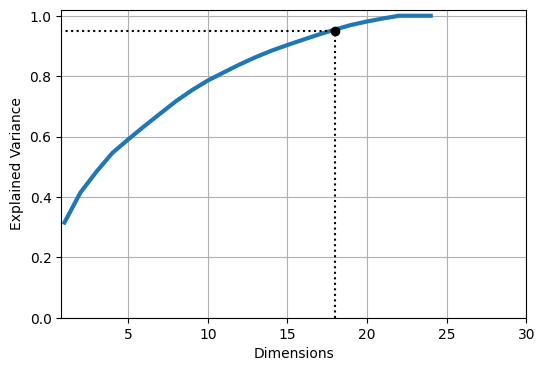

In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6, 4))
plt.plot(range(1,25), cumsum, linewidth=3)
plt.axis([0.8, 30, 0, 1.02])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [ ]:
pca.components_

array([[ 2.32082383e-02, -1.52923392e-02,  2.63793604e-01,
        -2.46697133e-01, -7.06451299e-02,  1.48975775e-03,
         2.85403889e-01,  2.49069508e-01,  2.97893617e-01,
         2.58801614e-01,  2.49403680e-01,  2.06128989e-01,
        -5.68515109e-02,  1.95331700e-01,  2.97196817e-01,
         2.62221332e-01, -2.25814814e-01, -1.34028759e-02,
         9.70378756e-02,  4.82776050e-02,  3.45296711e-01,
        -2.28100801e-01,  4.11268760e-02,  1.59824873e-01],
       [ 1.93391279e-01, -3.63415277e-02,  8.75161015e-02,
         7.34475394e-03,  5.06516475e-01,  1.33424743e-02,
         1.93846099e-01, -8.14573359e-02, -7.20319924e-02,
        -9.36219018e-02, -6.91102899e-02,  9.85528064e-02,
         4.43466317e-01,  3.25890624e-01,  4.32551030e-02,
         1.67755415e-01,  1.76850103e-01,  3.35813454e-03,
         1.45017301e-02,  2.86885304e-01,  7.15794359e-02,
         3.73161032e-01,  1.81950623e-01, -3.93677516e-03],
       [-1.62922880e-01, -2.42975639e-02, -1.69844019e

In [ ]:
# Podatke spremamo u DataFrame
X_pca = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1,25)])
X_pca["y"] = y
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,y
0,4.522339,0.185930,2.378018,-0.828763,-1.500671,0.174658,0.150112,-0.527184,0.842344,1.883622,...,0.605457,-1.194536,0.796069,-0.350295,0.089505,0.936321,0.231445,2.706092e-15,3.014718e-16,1.0
1,-2.891202,0.255239,-1.563872,0.522108,-0.600044,-1.199098,0.107138,-0.862825,-0.603440,0.652862,...,0.027340,-0.180631,-0.135898,-0.164824,0.084282,0.134088,0.140849,7.339073e-16,2.097316e-16,0.0
2,1.950739,-0.714718,-0.533632,-0.502710,-0.854804,-0.032697,-0.453784,1.331107,0.062519,-0.952581,...,-0.863599,0.034987,0.977454,0.423723,-0.279693,0.013876,0.116035,2.048422e-15,1.043718e-15,0.0
3,-2.652932,-1.722350,0.230188,-0.003038,0.246722,-0.757561,-0.404427,0.017073,0.212854,-1.093541,...,-0.069077,0.132852,0.091526,-0.220033,-0.019207,-0.029960,0.071753,2.194830e-15,5.368695e-16,0.0
4,-0.509989,-0.081380,-0.402458,-0.393856,2.274667,0.577376,-0.087168,-0.777703,1.540914,-0.679464,...,-0.371264,0.232292,0.061878,0.767629,-0.349330,0.179547,0.167438,3.255930e-15,2.485260e-16,0.0


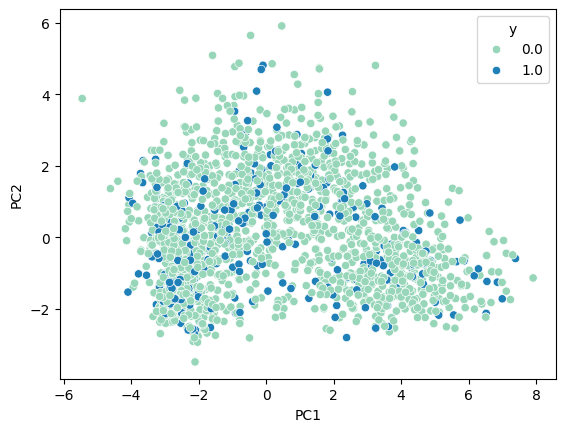

In [ ]:
sns.scatterplot(x="PC1", y="PC2", data=X_pca, hue="y", palette="YlGnBu");

In [ ]:
fig = px.scatter_3d(X_pca,
                    x="PC1",
                    y="PC2",
                    z="PC3",
                    color="y")

fig.update_coloraxes(showscale=False)
fig.show()

In [ ]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("Shape:", X_pca.shape)
print("Num components:", pca.n_components)
print("Componetns shape:", pca.components_.shape)
print(f"Explained variance: {pca.explained_variance_ratio_.sum()*100:.2f}%")

Shape: (2213, 18)
Num components: 0.95
Componetns shape: (18, 24)
Explained variance: 95.45%


#kMeans

Za dimenziju 2

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Shape:", X_pca.shape)
print("Num components:", pca.n_components)
print("Componetns shape:", pca.components_.shape)
print(f"Explained variance: {pca.explained_variance_ratio_.sum()*100:.2f}%")

Shape: (2213, 2)
Num components: 2
Componetns shape: (2, 24)
Explained variance: 41.42%


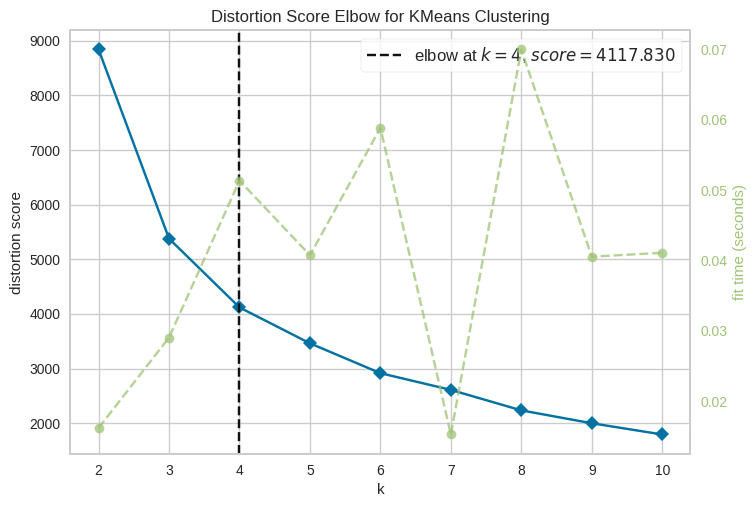

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
PCA_ds = pd.DataFrame(X_pca, columns=(["col1","col2"]))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

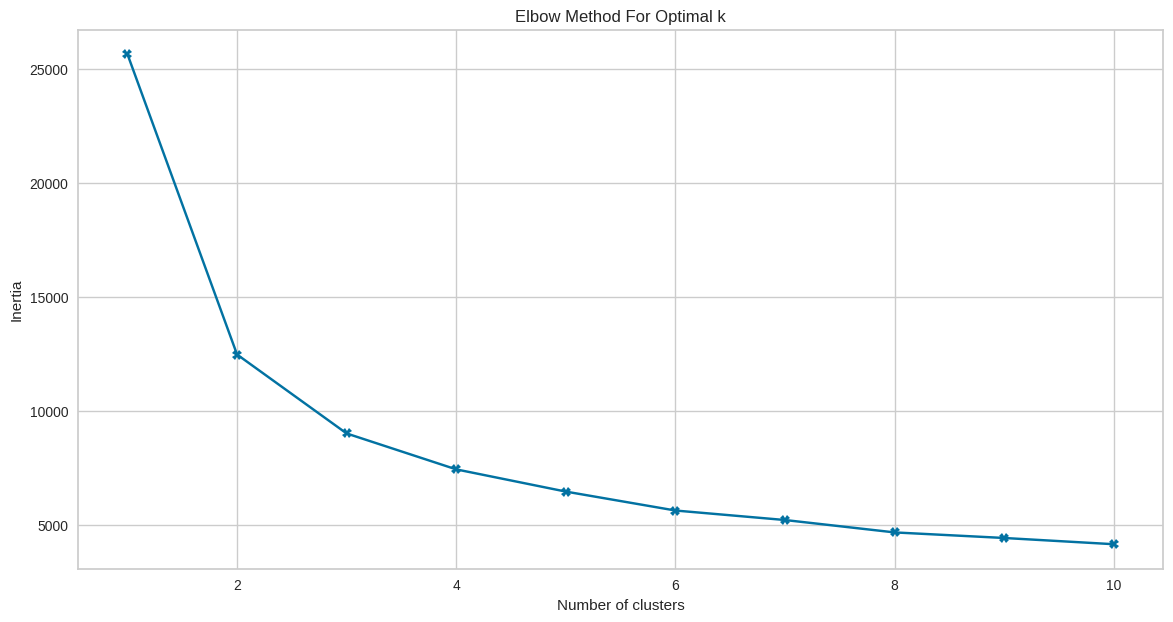

In [ ]:
def plot_elbow_method(X, max_clusters=10):
    inertia = []
    K = range(1, max_clusters + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow method
    plt.figure(figsize=(14, 7))
    plt.plot(K, inertia, 'bX-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()


def plot_cluster(k, data, model, x, y, title = None):
  data = pd.DataFrame(data)  # Convert data to DataFrame
  data.columns = [x, y]
  if title != None:
    plt.title(title)
  else:
    plt.title(f'Scatter Plot for {k} Clusters')
  sns.scatterplot(data = data, x = x, y = y, hue = model.labels_)
  plt.show()


# Plot Elbow Method using earlier function
plot_elbow_method(X_pca, max_clusters=10)

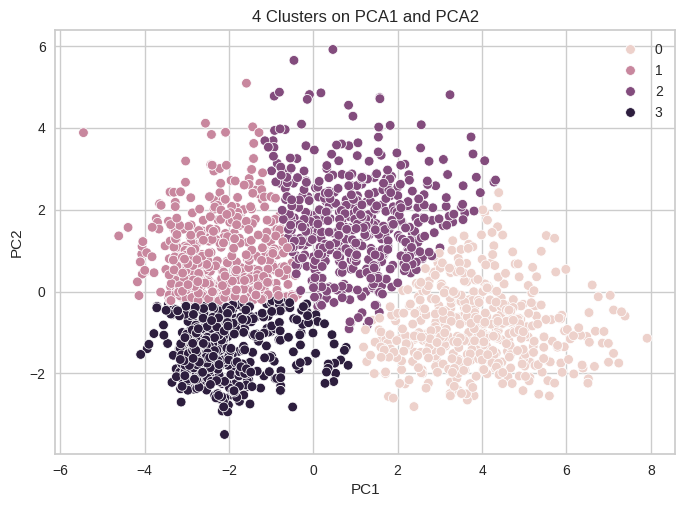

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X_pca)

plot_cluster(4, X_pca, kmeans, 'PC1', 'PC2', title = '4 Clusters on PCA1 and PCA2')

Shape: (2213, 3)
Num components: 3
Componetns shape: (3, 24)
Explained variance: 48.31%


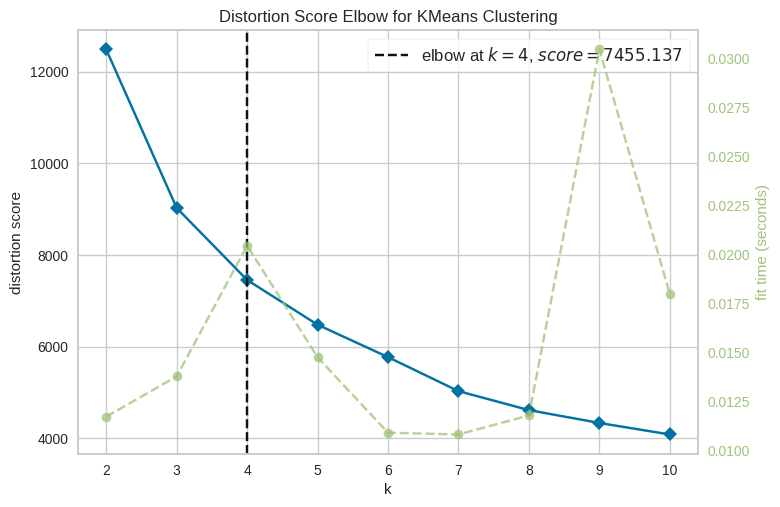

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
print("Shape:", X_pca.shape)
print("Num components:", pca.n_components)
print("Componetns shape:", pca.components_.shape)
print(f"Explained variance: {pca.explained_variance_ratio_.sum()*100:.2f}%")


PCA_ds = pd.DataFrame(X_pca, columns=(["col1","col2", "col3"]))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

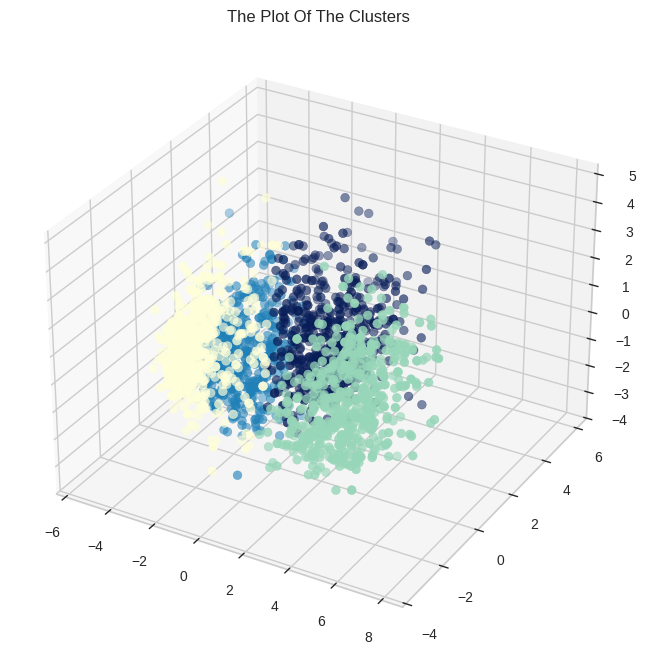

In [ ]:
kmeans = KMeans(n_clusters=4).fit_predict(X_pca)
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans, marker='o', cmap='YlGnBu')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
fig = px.scatter_3d(X_pca,
                    x,
                    y,
                    z,
                    color=kmeans)

fig.update_coloraxes(showscale=False)
fig.show()